<a href="https://colab.research.google.com/github/AchiengMary/bin.classification_model/blob/main/model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting the zip folder

In [ ]:
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('images')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations between -30 and 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom images by 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest',  # Fill the empty pixels after transformations
    validation_split=0.2  # Reserve 20% of data for validation
)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    'images/images',  # Path to the dataset
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='binary',  # Binary classification (real vs AI-generated)
    subset='training',  # Use the training subset
    shuffle=True  # Shuffle the dataset for randomness
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    'images/images',  # Path to the dataset
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='binary',  # Binary classification (real vs AI-generated)
    subset='validation',  # Use the validation subset
    shuffle=True  # Shuffle the dataset for randomness
)

Found 121 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary output (real vs AI-generated)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,  # The data generator with training data and augmentation
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,  # The validation data generator
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Number of validation batches per epoch
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.4956 - loss: 1.1565 - val_accuracy: 0.3333 - val_loss: 1.0719
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3125 - loss: 1.2740

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3125 - loss: 1.2740 - val_accuracy: 0.3333 - val_loss: 0.7049
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5885 - loss: 0.6701 - val_accuracy: 0.6667 - val_loss: 0.6603
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6875 - loss: 0.6111 - val_accuracy: 0.6667 - val_loss: 0.6575
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6031 - loss: 0.6954 - val_accuracy: 0.6667 - val_loss: 0.6232
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 744ms/step - accuracy: 0.7188 - loss: 0.5460 - val_accuracy: 0.6667 - val_loss: 0.6167
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.6869 - loss: 0.5856 - val_accuracy: 0.6667 - val_loss: 0.6016
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 730ms/step - accuracy: 0.6562 - loss: 0.5670 - val_accuracy: 0.7000 - val_loss: 0.6546
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.7766 - loss: 0.5695 - val_accuracy: 0.7000 - val_loss: 0.6130
Epoch 10/10
3/3 ━

In [ ]:
# Evaluate the model on the validation set
score = model.evaluate(validation_generator)
print(f"Validation Loss: {score[0]}")
print(f"Validation Accuracy: {score[1]}")

# Save the trained model
model.save('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7333 - loss: 0.6181


Validation Loss: 0.6181046962738037
Validation Accuracy: 0.7333333492279053


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the image you want to test (adjust the path to your image)
img_path = 'download.jpeg'

# Load the image and resize it to 224x224 pixels
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra dimension to match the model's input shape (batch size of 1)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (same as during training)
img_array = img_array / 255.0

In [ ]:
# Make a prediction
prediction = model.predict(img_array)

# Output the result
if prediction[0] > 0.5:
    print("The image is AI-generated.")
else:
    print("The image is real.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
The image is AI-generated.


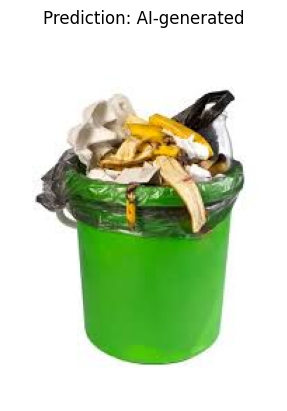

In [ ]:
import matplotlib.pyplot as plt

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {"AI-generated" if prediction[0] > 0.5 else "Real"}')
plt.axis('off')  # Hide axes
plt.show()